<a href="https://colab.research.google.com/github/VaniaJesus/Projeto-Analitycs/blob/main/AED_Projeto-Pronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto de Análise Exploratória de Dados
---

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">The Olympics</font></h1>
<hr>

In [ ]:
#@title Identificação

#@markdown Turma
Turma = '2 A' #@param {type:"string"}
#@markdown Integrantes do Grupo
Aluno1 = 'Aparecida Vania de Jesus  Tia 2250652' #@param {type:"string"}
Aluno2 = '' #@param {type:"string"}
Aluno3 = '' #@param {type:"string"}
Aluno4 = '' #@param {type:"string"}



# Problema 
  
**Analisar se do evento do ano 2000 em diante a idade dos atletas teve grande influência no crescimento ou decrécimo do número de medalhas.**

# Descrição e origem dos dados 

O Dataset das Olimpiadas é composto de dados dos atletas como nome, idade, sexo, altura e peso, e tambem contem o numero de medalhas obtido por cada equipe em cada uma das edições do evento: Verão e Inverno. 
A cidade que sedoi o evento, o ano do evento.
Apresenta tambem o nome da modalidade de cada esporte.






# Aquisição dos Dados

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais  reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis). 





In [41]:
import pandas as pd
import numpy as np


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/olympics.csv')
dados.head(10)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
# Como vamos fazer uma análise se houve o aumento da quantidade de medalhas e depois se o sexo ou a idade influência este fator. O Slice foi pensando nisso.
# Irei alterar o nome das colunas para o portugues

In [7]:
dados.columns

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')

In [12]:
dados = dados.rename(columns={
    "ID": "Id",
    "name": "Nome",
    "sex": "Sexo",
    "age": "Idade",
    "height": "Altura",
    "weight": "Peso",
    "team": "Equipe",
    "noc": "País",
    "games": "Jogos",
    "year": "Ano",
    "season": "Temporada",
    "city": "Sede",
    "sport": "Esporte",
    "event": "Evento",
    "medal": "Medalha"
})

print(dados.columns)

Index(['id', 'Nome', 'Sexo', 'Idade', 'Altura', 'Peso', 'Equipe', 'País',
       'Jogos', 'Ano', 'Temporada', 'Sede', 'Esporte', 'Evento', 'Medalha'],
      dtype='object')


In [27]:
#Tratando dados nulos. Os dados de Medalha foram subistituidos por 0 e os dados de altura foram substituidos pela média da coluna.
dados ['Medalha'] = dados ['Medalha']. fillna (0)

In [28]:
# Dados que irei usar - Somnete Brasil
# Filtrar os dados com a condição desejada
dados_BR = dados.loc[dados['Equipe'] == 'Brazil', ['id', 'Ano','Sexo','Idade','País', 'Esporte', 'Medalha']]

print(dados_BR)

            id        Ano Sexo  Idade País     Esporte Medalha
665        386 1972-01-01    M   22.0  BRA  Volleyball       0
666        386 1976-01-01    M   26.0  BRA  Volleyball       0
668        388 1972-01-01    M   19.0  BRA    Football       0
781        451 2016-01-01    F   21.0  BRA  Water Polo       0
1005       565 2004-01-01    M   26.0  BRA      Boxing       0
...        ...        ...  ...    ...  ...         ...     ...
268652  134400 1992-01-01    F   26.0  BRA  Basketball       0
269745  134976 1936-01-01    F   17.0  BRA    Swimming       0
269899  135037 2016-01-01    M   32.0  BRA   Athletics       0
270478  135289 1952-01-01    M   20.0  BRA    Football       0
270789  135423 1948-01-01    M   22.0  BRA      Boxing       0

[3772 rows x 7 columns]


# Análise dos Dados


## Estrutura dos Dados

Descreva resumidamente a estrutura dos dados.

In [5]:
dados.shape

(271116, 15)

In [6]:
dados.dtypes

id          int64
name       object
sex        object
age       float64
height    float64
weight    float64
team       object
noc        object
games      object
year        int64
season     object
city       object
sport      object
event      object
medal      object
dtype: object

In [8]:
## Veridicando qtde de valores nulos
dados.isnull().sum()

id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

In [9]:
# Obtendo o número de Medalhas e os esportes


In [10]:
dados['medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: medal, dtype: int64

In [11]:
dados['sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: sport, Length: 66, dtype: int64

In [13]:
# Verificação dos anos
display(dados.Ano.min(),dados.Ano.max())

1896

2016

In [17]:
# Considerando as idades minimasn de 12 anos e máxima de 40 anos para o Boxe. 
# A maioria tem até 32 anos

Text(0.5, 1.0, 'Idade')

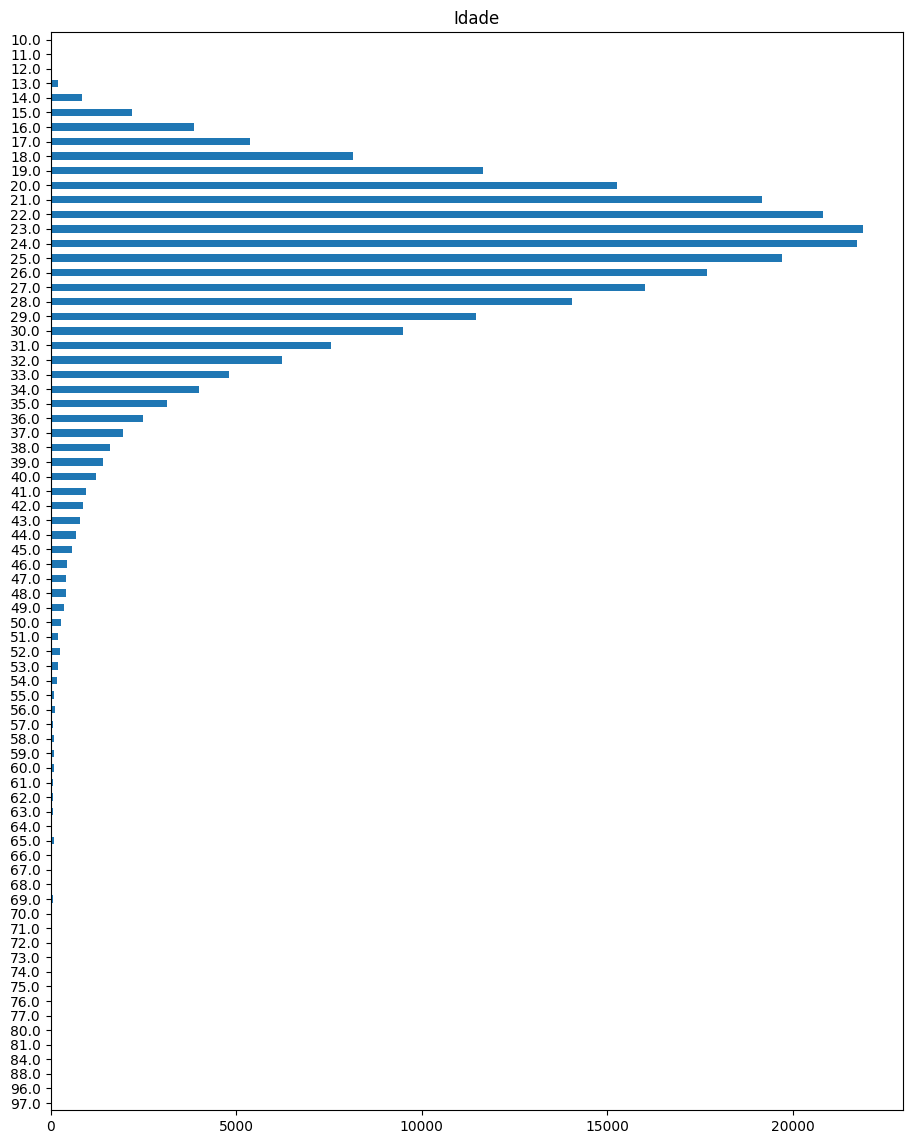

In [18]:
plt.figure(figsize=(11,14))
dados['Idade'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Idade')

In [19]:
#Outliers

In [20]:
# Calcula o intervalo interquartil (IQR)
Q1 = dados['Idade'].quantile(0.25)
Q3 = dados['Idade'].quantile(0.75)
IQR = Q3 - Q1

# Identifica os outliers
outliers = dados[(dados['Idade'] < Q1 - 1.5 * IQR) | (dados['Idade'] > Q3 + 1.5 * IQR)]

print(outliers)

            id                                       Nome Sexo  Idade  Altura  \
58          19                      Win Valdemar Aaltonen    M   54.0     NaN   
89          28                           Jan-Erik Aarberg    M   43.0   170.0   
90          28                           Jan-Erik Aarberg    M   47.0   170.0   
124         45                                Hakon Aasns    M   41.0     NaN   
126         46                                 Hans Aasns    M   45.0   194.0   
...        ...                                        ...  ...    ...     ...   
270753  135406                              Bla Zulawszky    M   42.0     NaN   
270955  135494                               Jacek uawski    M   41.0     NaN   
270970  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)    F   39.0   183.0   
270971  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)    F   43.0   183.0   
270972  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)    F   47.0   183.0   

         Peso   Equipe País

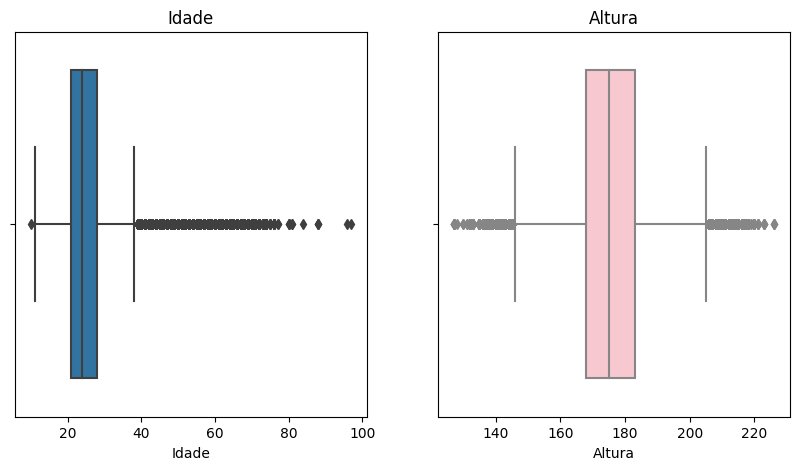

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

sns.boxplot(x='Idade', data=dados, ax=axs[0])
axs[0].set_title('Idade')

sns.boxplot(x='Altura', data=dados, color='pink', ax=axs[1])
axs[1].set_title('Altura')
plt.show()

In [23]:
# Avaliando os tipos de esporte, pode-se concluir e os Outleirs de peso na verdade não são porque são de esportes em que os atletas pesam mais.
# Avaliando os dados verificamso que os mais baixos são ginástas e os mais altos são Jogadores de Basquete e Voley

In [24]:
#Alterando a data
dados['Ano'] = pd.to_datetime(dados['Ano'], format='%Y')

In [25]:
# Medalhas do Brasil

In [29]:
num_medals = dados_BR['Medalha'].value_counts()
num_medals

0         3323
Bronze     185
Silver     161
Gold       103
Name: Medalha, dtype: int64

In [30]:
medalhas_por_ano_tipo = dados_BR[dados_BR['Medalha'] != 0]
medalhas_por_ano_tipo

,id,Ano,Sexo,Idade,País,Esporte,Medalha
1651,918,1984-01-01,M,24.0,BRA,Football,Silver
1652,918,1988-01-01,M,28.0,BRA,Football,Silver
1668,925,2012-01-01,F,25.0,BRA,Volleyball,Gold
1733,966,1984-01-01,M,26.0,BRA,Sailing,Silver
1856,1020,1996-01-01,F,25.0,BRA,Basketball,Silver
...,...,...,...,...,...,...,...
267707,133931,2012-01-01,M,22.0,BRA,Gymnastics,Gold
267709,133931,2016-01-01,M,26.0,BRA,Gymnastics,Silver
268211,134186,1996-01-01,M,19.0,BRA,Football,Bronze
268219,134191,1996-01-01,M,22.0,BRA,Football,Bronze


In [31]:
import matplotlib.pyplot as plt

In [35]:
# Alterando a coluna Ano no slice do dataset
dados_Br3 = dados.loc[dados['País'] == 'BRA', ['id', 'Ano', 'Sexo','Idade','País', 'Esporte', 'Medalha']]
dados_Br3['Ano'] = pd.to_datetime(dados_Br3['Ano']).dt.year

## Análise (pergunta) 1.

**Quantas medalhas o Brasil ganhou desde o inicio do registro dos dados e se houve aumento ou decréscimo?**



In [32]:
#@markdown ---
#@title Q1. Aponte os principais recursos empregados nesta pergunta aqui:

Q1a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q1b = "Exclusao de Nulos (dropna)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q1c = "Agregacao simples" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q1d = "Evolucao dos dados (plot, lineplot)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q1e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q1f = "" #@param {type:"string"}


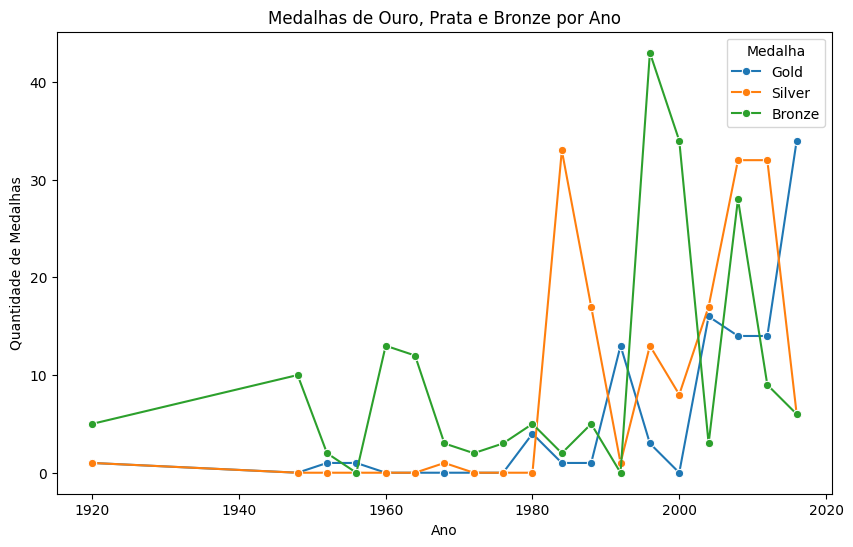

In [33]:
# Selecionar apenas linhas com medalhas de ouro, prata e bronze
# Contando as medalhas por ano e tipo e criar uma tabela pivot

dados_BR = dados.loc[dados['Equipe'] == 'Brazil', ['id', 'Ano', 'Medalha', 'Esporte']]

medalhas_por_ano_tipo = dados_BR[dados_BR['Medalha'].isin(['Gold', 'Silver', 'Bronze'])]

medalhas_por_ano_tipo = medalhas_por_ano_tipo.groupby(['Ano', 'Medalha']).count().reset_index()
medalhas_pivot = medalhas_por_ano_tipo.pivot_table(values='id', index='Ano', columns='Medalha', fill_value=0).reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=medalhas_pivot, x='Ano', y='Gold', label='Gold', marker='o')
sns.lineplot(data=medalhas_pivot, x='Ano', y='Silver', label='Silver', marker='o')
sns.lineplot(data=medalhas_pivot, x='Ano', y='Bronze', label='Bronze', marker='o')

plt.title('Medalhas de Ouro, Prata e Bronze por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Medalhas')
plt.legend(title='Medalha')
plt.show()

In [34]:
# Alterando o formato da coluna Ano 
dados_BR = dados.loc[dados['Equipe'] == 'Brazil', ['id', 'Ano', 'Medalha', 'Esporte']]
dados_BR['Ano'] = pd.to_datetime(dados_BR['Ano']).dt.year


Podemos verificar que houve um crescimento do número de medalhas nos a partir dos anos 80 com um pico considerável no anos 2000.

## Análise (pergunta) 2.

** Qual esporte ganhou mais medalhas nas 5 últimas Olimpiadas 2000 a 20016?**



In [48]:
#@markdown ---
#@title Q2. Aponte os principais recursos empregados nesta pergunta aqui:

Q2a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q2b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q2c = "Agregacao multipla" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q2d = "Distribuicao (hist, density, boxplot)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q2e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q2f = "" #@param {type:"string"}


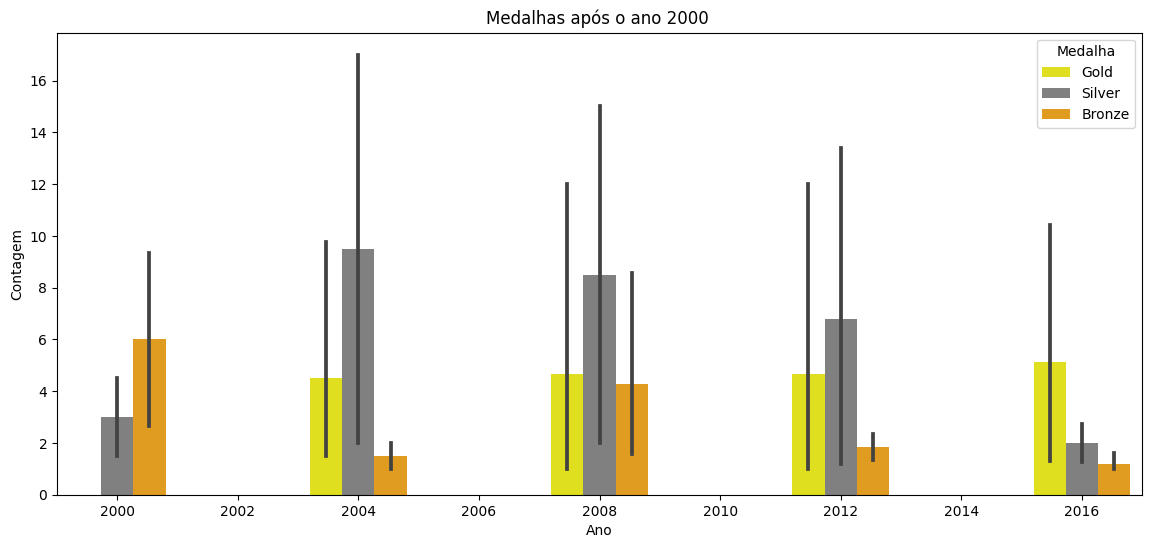

In [36]:
medalhas_por_ano_esporte = dados_Br3.groupby(['Ano', 'Esporte', 'Medalha']).size().reset_index(name='Contagem')

medalhas_por_ano_esporte1 = medalhas_por_ano_esporte.loc[medalhas_por_ano_esporte['Ano'] >= 2000]

plt.figure(figsize=(14, 6))
sns.barplot(data=medalhas_por_ano_esporte1, x='Ano', y='Contagem', hue='Medalha', hue_order=['Gold', 'Silver', 'Bronze'], palette=['yellow', 'gray', 'orange'])

plt.title('Medalhas após o ano 2000 ')
plt.show()

In [42]:
tabela = pd.pivot_table(medalhas_por_ano_esporte1, values='Contagem', index=['Esporte'], columns=['Medalha'], aggfunc=np.sum, fill_value=0)

tabela['Total'] = tabela.sum(axis=1)
print(tabela)


Medalha                  0  Bronze  Gold  Silver  Total
Esporte                                                
Alpine Skiing           15       0     0       0     15
Archery                 14       0     0       0     14
Athletics              215       5     2       5    227
Badminton                2       0     0       0      2
Basketball              70      12     0       0     82
Beach Volleyball        18       6     4      12     40
Biathlon                 2       0     0       0      2
Bobsleigh               14       0     0       0     14
Boxing                  32       2     1       1     36
Canoeing                32       1     0       3     36
Cross Country Skiing     8       0     0       0      8
Cycling                 36       0     0       0     36
Diving                  28       0     0       0     28
Equestrianism           86       4     1       0     91
Fencing                 34       0     0       0     34
Figure Skating           1       0     0       0

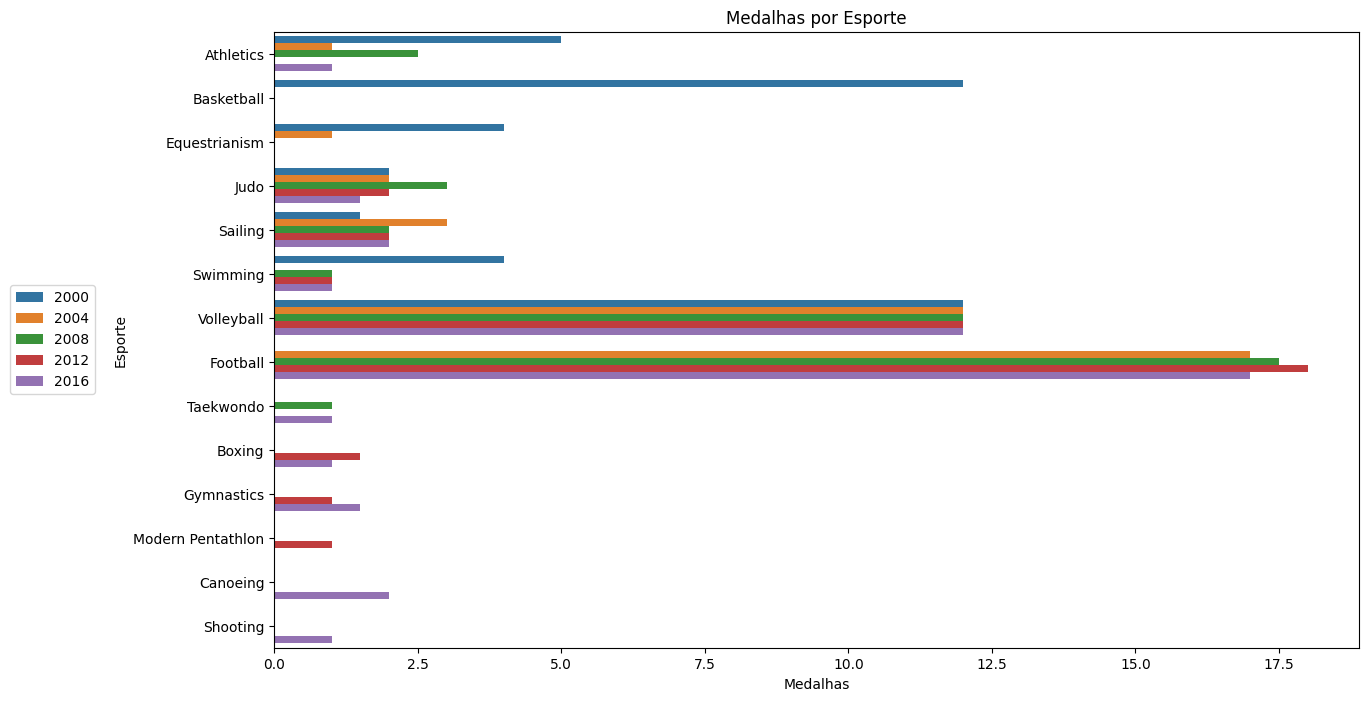

In [49]:
# Nos últimos 5 jogos
dados_BR_filtrados = dados_Br3[(dados_Br3['Ano'] >= 2000) & (dados_BR['Medalha'].isin(['Gold', 'Silver', 'Bronze']))]

medalhas_por_esporte_ano = dados_BR_filtrados.groupby(['Ano', 'Esporte', 'Medalha']).size().reset_index(name='Contagem')

plt.figure(figsize=(14, 8))
sns.barplot(data=medalhas_por_esporte_ano, x='Contagem', y='Esporte', hue='Ano', errorbar=None)

plt.title('Medalhas por Esporte')
plt.xlabel('Medalhas')
plt.ylabel('Esporte')
plt.legend(bbox_to_anchor=(-0.25, 0.5), loc='center left')

plt.show()


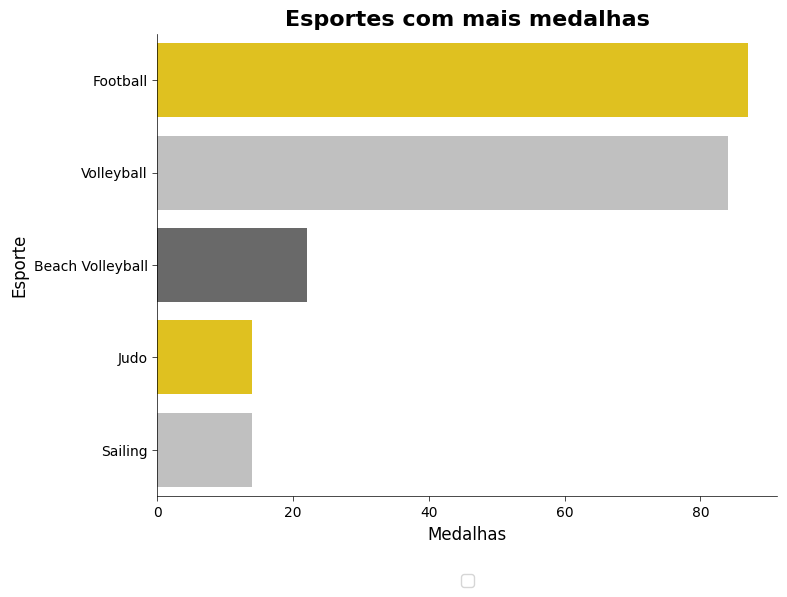

In [51]:
# Esportes com maior numero de medalhas.

medalhas_por_esporte = dados_Br3.query('Ano >= 2000').groupby(['Esporte', 'Medalha']).size().reset_index(name='Contagem')
medalhas_por_esporte = medalhas_por_esporte[medalhas_por_esporte['Medalha'].isin(['Gold', 'Silver', 'Bronze'])]

total_por_esporte = medalhas_por_esporte.groupby('Esporte')['Contagem'].sum().reset_index(name='Total')

mais_medalhas = total_por_esporte.sort_values('Total', ascending=False).head(5)

cores_personalizadas = ['gold', 'silver', 'dimgrey']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Total', y='Esporte', data=mais_medalhas, palette=cores_personalizadas, errorbar=None)

ax.set_title('Esportes com mais medalhas', fontsize=16, weight='bold')
ax.set_xlabel('Medalhas', fontsize=12)
ax.set_ylabel('Esporte', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(axis='x', which='major', width=0.5)
ax.tick_params(axis='y', which='major', width=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(mais_medalhas), fontsize=12)

plt.show()



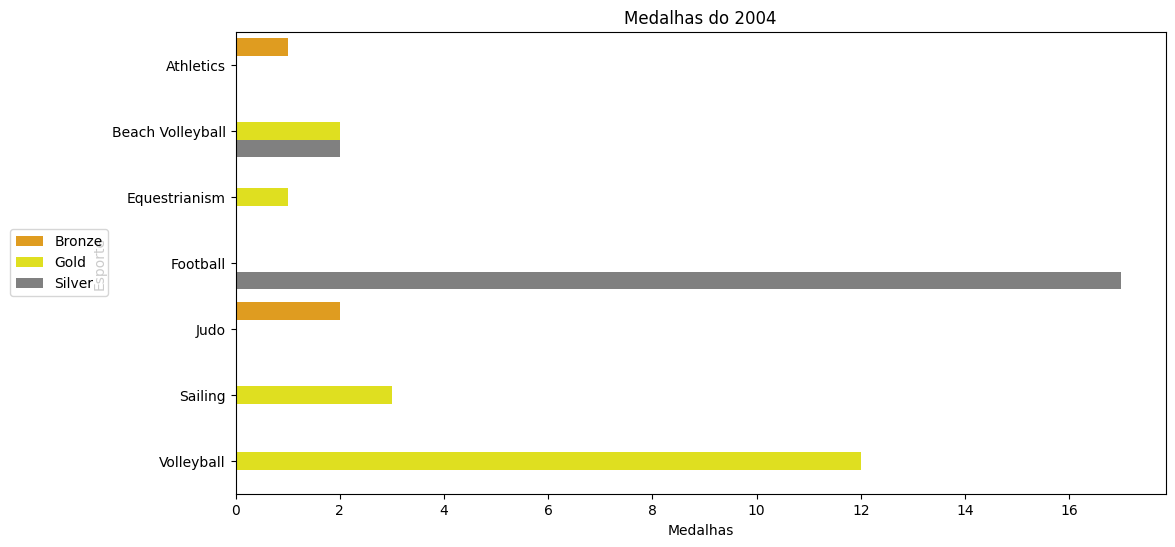

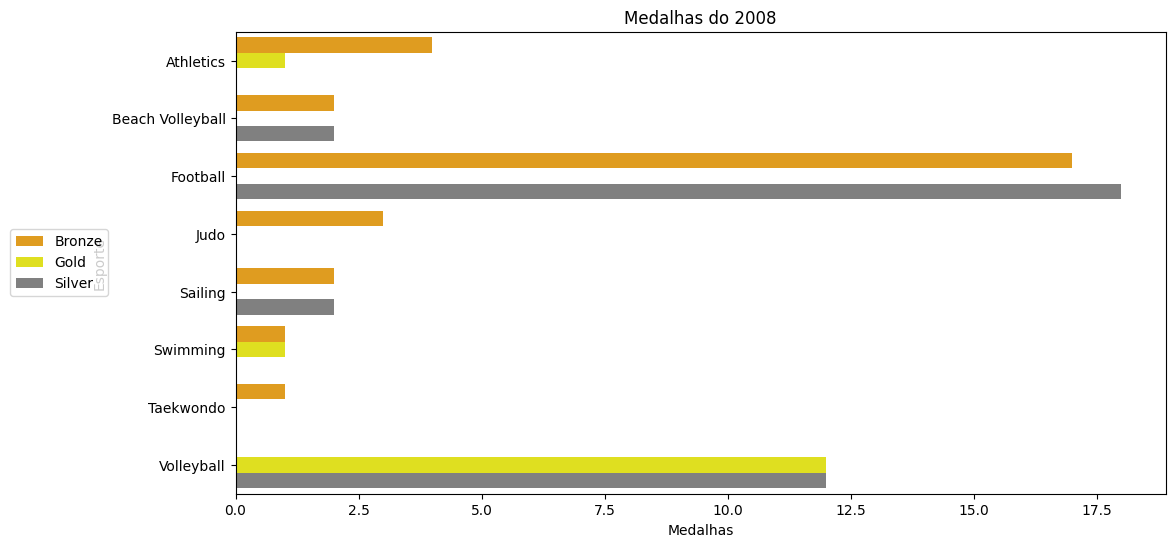

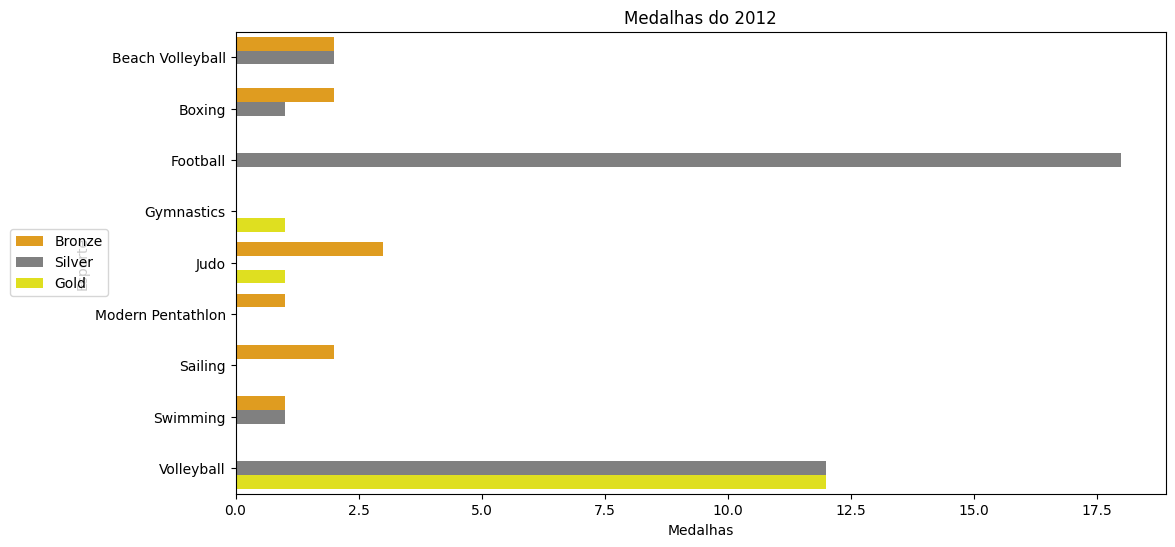

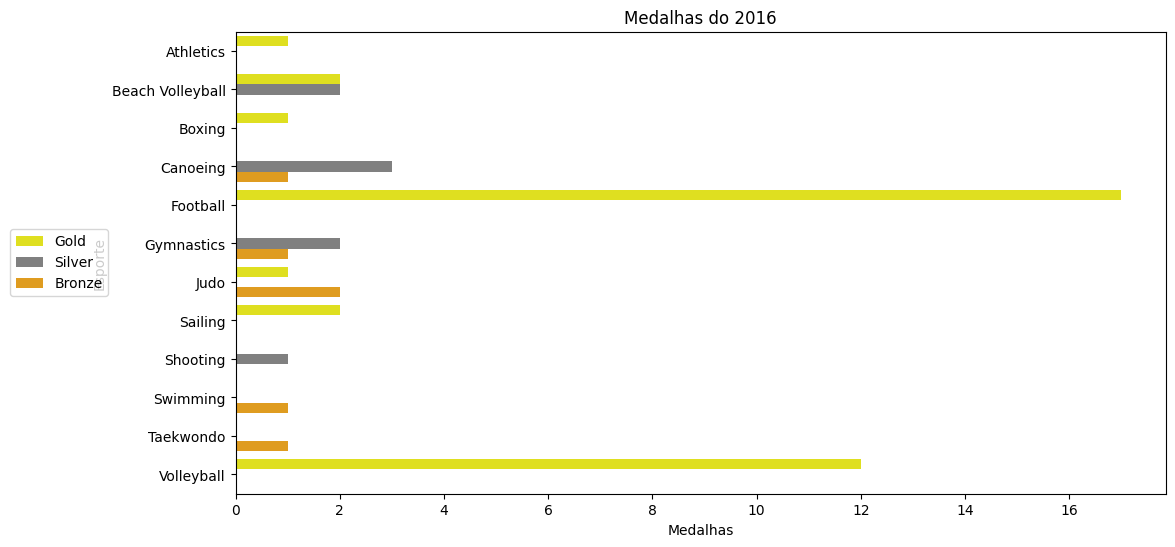

In [52]:
# Medalhas por edição dos jogos

dados_BR_filtrados = dados_Br3[dados_Br3['Medalha'].isin(['Gold', 'Silver', 'Bronze'])]

medalha_cores = {'Gold': 'yellow', 'Silver': 'gray', 'Bronze': 'orange'}

def plot_medalhas_por_ano(ano):
    # Filtrar os dados para o ano específico
    medalhas_por_ano = dados_BR_filtrados[dados_BR_filtrados['Ano'] == ano]
    
    # Contar o número de medalhas por esporte
    medalhas_por_esporte = medalhas_por_ano.groupby(['Esporte', 'Medalha']).size().reset_index(name='Contagem')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=medalhas_por_esporte, x='Contagem', y='Esporte', hue='Medalha', errorbar=None, palette=medalha_cores)
    
    plt.title(f'Medalhas do {ano}')
    plt.xlabel( 'Medalhas')
    plt.ylabel('Esporte')
    plt.legend(bbox_to_anchor=(-0.25, 0.5), loc='center left')
    
    plt.show()

plot_medalhas_por_ano(2004)
plot_medalhas_por_ano(2008)
plot_medalhas_por_ano(2012)
plot_medalhas_por_ano(2016)


**Como podemos visualizar os esportes que mais ganharam medalhas nas últimas 5 edições dos jogos são: Futbol, Voley e Voley de Praia.**

## Análise (pergunta) 3.

**Qual é a média de idade dos medalhistas, por tipo de medalhas nas 5 últimas Olimpiadas?**

**...**. ...

In [60]:
#@markdown ---
#@title Q3. Aponte os principais recursos empregados nesta pergunta aqui:

Q3a = "Proporcoes de valores" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q3b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q3c = "Agregacao multipla" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q3d = "Distribuicao (hist, density, boxplot)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q3e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q3f = "" #@param {type:"string"}


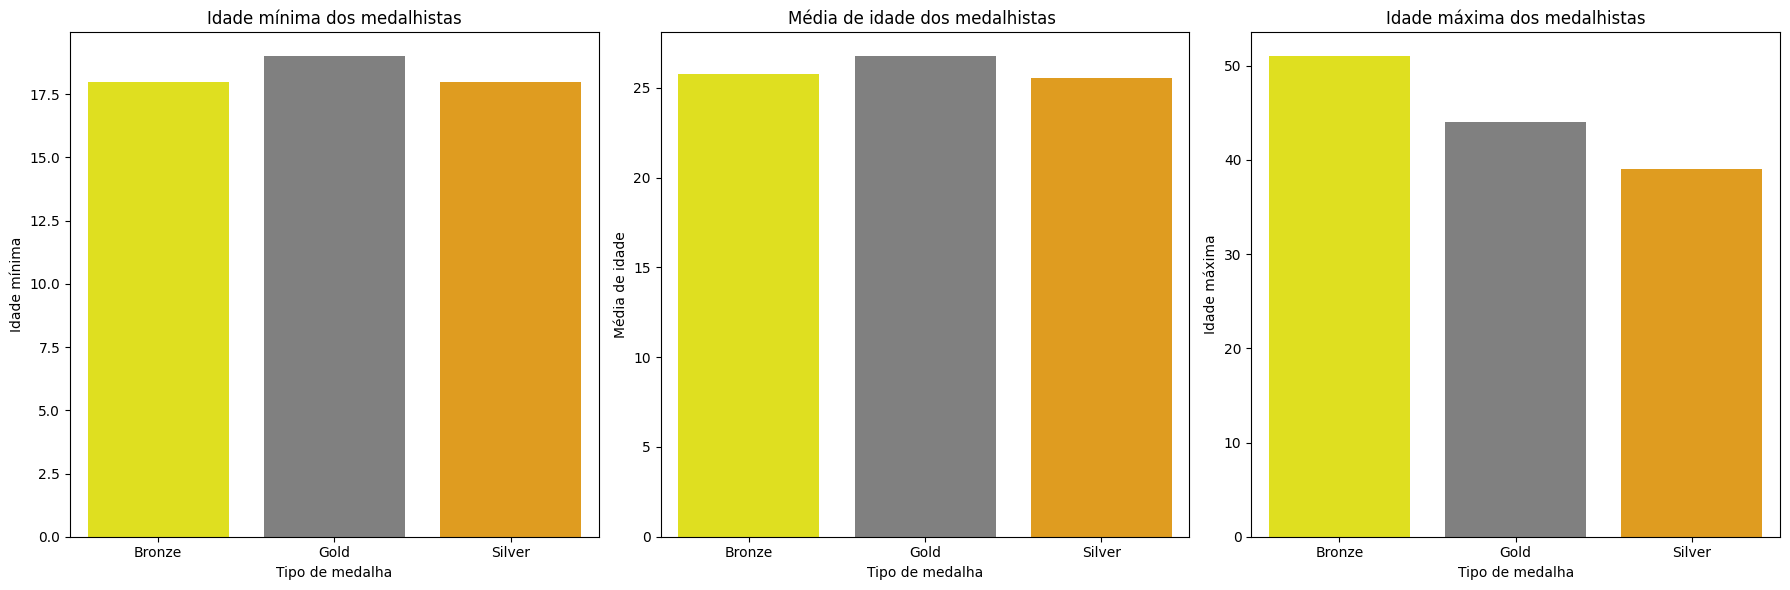

In [56]:
# Média dos medalhistas
dados_Br3 = dados_Br3[dados_Br3['Medalha'].isin(['Gold', 'Silver', 'Bronze'])]

medalhas_por_idade1 = dados_Br3.groupby(['Medalha'])['Idade'].min()
medalhas_por_idade2 = dados_Br3.groupby(['Medalha'])['Idade'].mean()
medalhas_por_idade3 = dados_Br3.groupby(['Medalha'])['Idade'].max()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.barplot(x=medalhas_por_idade1.index, y=medalhas_por_idade1.values, hue_order=['Gold', 'Silver', 'Bronze'], palette=['yellow', 'gray', 'orange'], ax=axes[0])
axes[0].set_title('Idade mínima dos medalhistas')
axes[0].set_xlabel('Tipo de medalha')
axes[0].set_ylabel('Idade mínima')

sns.barplot(x=medalhas_por_idade2.index, y=medalhas_por_idade2.values, hue_order=['Gold', 'Silver', 'Bronze'], palette=['yellow', 'gray', 'orange'], ax=axes[1])
axes[1].set_title('Média de idade dos medalhistas ')
axes[1].set_xlabel('Tipo de medalha')
axes[1].set_ylabel('Média de idade')

sns.barplot(x=medalhas_por_idade3.index, y=medalhas_por_idade3.values, hue_order=['Gold', 'Silver', 'Bronze'], palette=['yellow', 'gray', 'orange'], ax=axes[2])
axes[2].set_title('Idade máxima dos medalhistas')
axes[2].set_xlabel('Tipo de medalha')
axes[2].set_ylabel('Idade máxima')

plt.tight_layout()
plt.show()

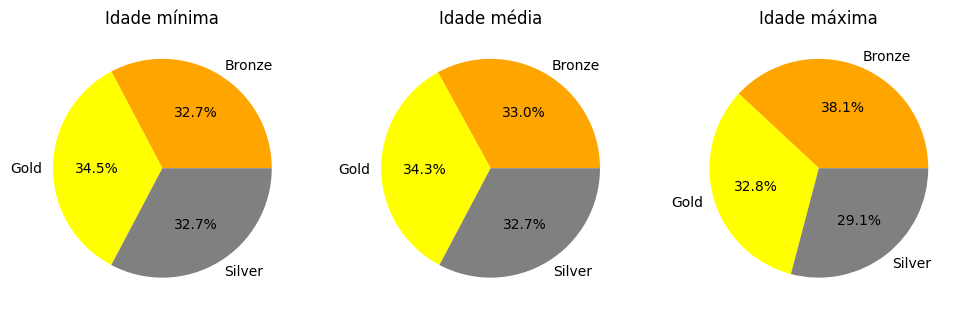

In [54]:
# Este gráfico é mais fácil para visualização
medalha_cores = {'Gold': 'yellow', 'Silver': 'gray', 'Bronze': 'orange'}

medalhas_min = dados_Br3.groupby(['Medalha'])['Idade'].min()
medalhas_media = dados_Br3.groupby(['Medalha'])['Idade'].mean()
medalhas_max = dados_Br3.groupby(['Medalha'])['Idade'].max()

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].pie(medalhas_min.values, labels=medalhas_min.index.tolist(), colors=[medalha_cores[i] for i in medalhas_min.index.tolist()], autopct='%1.1f%%')
axs[0].set_title('Idade mínima')

axs[1].pie(medalhas_media.values, labels=medalhas_media.index.tolist(), colors=[medalha_cores[i] for i in medalhas_media.index.tolist()], autopct='%1.1f%%')
axs[1].set_title('Idade média')

axs[2].pie(medalhas_max.values, labels=medalhas_max.index.tolist(), colors=[medalha_cores[i] for i in medalhas_max.index.tolist()], autopct='%1.1f%%')
axs[2].set_title('Idade máxima')

plt.show()

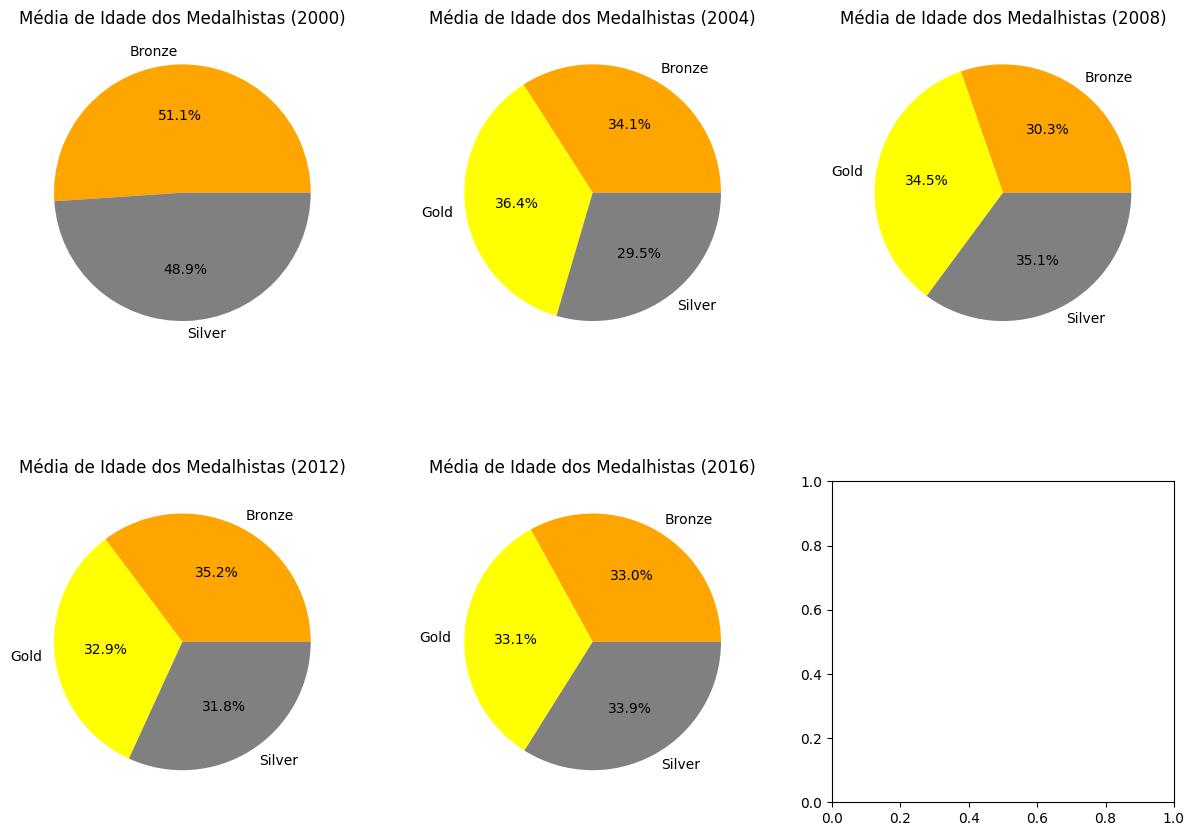

In [58]:
# Média de idade dos medalhistas por ano de evento.
medalha_cores = {'Gold': 'yellow', 'Silver': 'gray', 'Bronze': 'orange'}
medalhas_media = dados_Br3.groupby(['Ano', 'Medalha'])['Idade'].mean().reset_index()

medalhas_media = medalhas_media[medalhas_media['Ano'] >= 2000]

num_rows = (len(medalhas_media['Ano'].unique()) + 2) // 3 
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows)) 
axs = axs.ravel() # Ajuste do layout dos subplots

for idx, ano in enumerate(medalhas_media['Ano'].unique()):
    medalhas_ano = medalhas_media[medalhas_media['Ano'] == ano]
    ax = axs[idx]
    ax.pie(medalhas_ano['Idade'], labels=medalhas_ano['Medalha'], colors=[medalha_cores[m] for m in medalhas_ano['Medalha'].astype(str)], autopct='%1.1f%%')
    ax.set_title(f"Média de Idade dos Medalhistas ({ano})")

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()


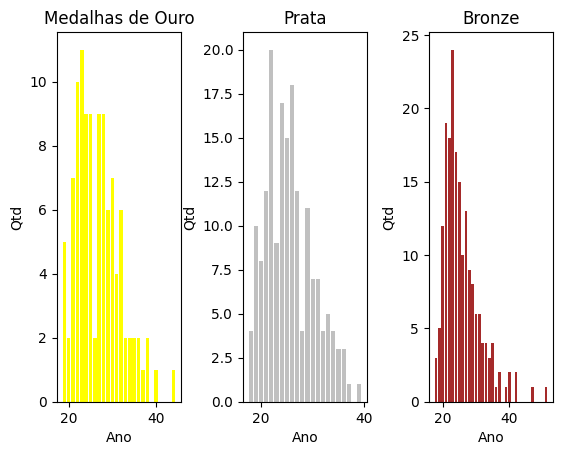

In [59]:
# Quantidade de medalhas por idade dos medalhistas
tipos_medalhas = dados_Br3[dados_Br3['Medalha'] == 'Gold']
tipos_medalhas_ouro = tipos_medalhas['Idade'].value_counts().sort_index()

plt.subplot(1, 3, 1) 
plt.bar(tipos_medalhas_ouro.index, tipos_medalhas_ouro, color='yellow')
plt.title("Medalhas de Ouro")
plt.xlabel("Ano")
plt.ylabel("Qtd")

tipos_medalhas2 = dados_Br3[dados_Br3['Medalha'] == 'Silver']
tipos_medalhas_prata = tipos_medalhas2['Idade'].value_counts().sort_index()

plt.subplot(1, 3, 2) 
plt.bar(tipos_medalhas_prata.index, tipos_medalhas_prata, color='silver')
plt.title("Prata")
plt.xlabel("Ano")
plt.ylabel("Qtd")

tipos_medalhas3 = dados_Br3[dados_Br3['Medalha'] == 'Bronze']
tipos_medalhas_bronze = tipos_medalhas3['Idade'].value_counts().sort_index()

plt.subplot(1, 3, 3) 
plt.bar(tipos_medalhas_bronze.index, tipos_medalhas_bronze, color='brown')
plt.title("Bronze")
plt.xlabel("Ano")
plt.ylabel("Qtd")

plt.subplots_adjust(wspace=0.5)
plt.show()

Podemos verificar que a média de idade dos medalhistas, por tipo de medalhas para os três tipos de medalhas é por volta dos 20 anos sendo que as medalhas de Prata se mantem por mais tempo e as medalhas de Ouro e Bronze tem uma qued vertiginosa conforma os atletas ficam mais velhos o que mostra uma queda no rendimento dos atletas brasileiros.


## Análise (pergunta) 4.

**O rendimento dos atletas de acordo com o sexo no periodo melhorou ou piorou ?**

**...**. ...

In [70]:
#@markdown ---
#@title Q4. Aponte os principais recursos empregados nesta pergunta aqui:

Q4a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q4b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q4c = "Agregacao multipla" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q4d = "Quantidades e Proporcoes (bar, pizza)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q4e = "Multiplas classes" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q4f = "" #@param {type:"string"}

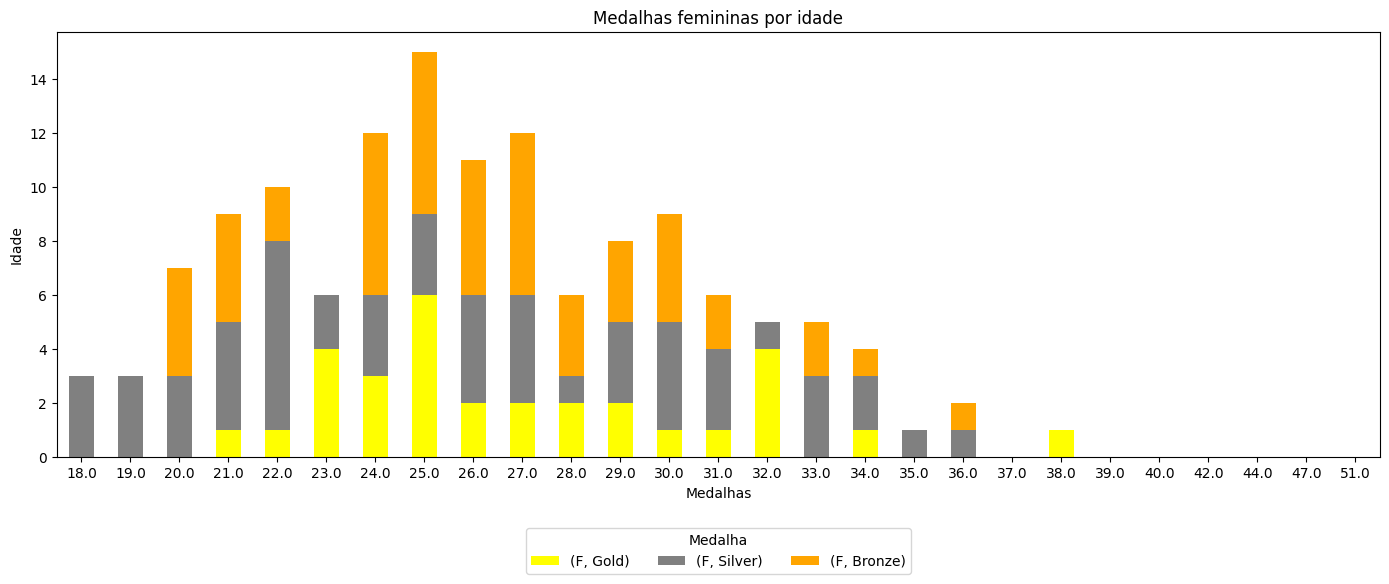

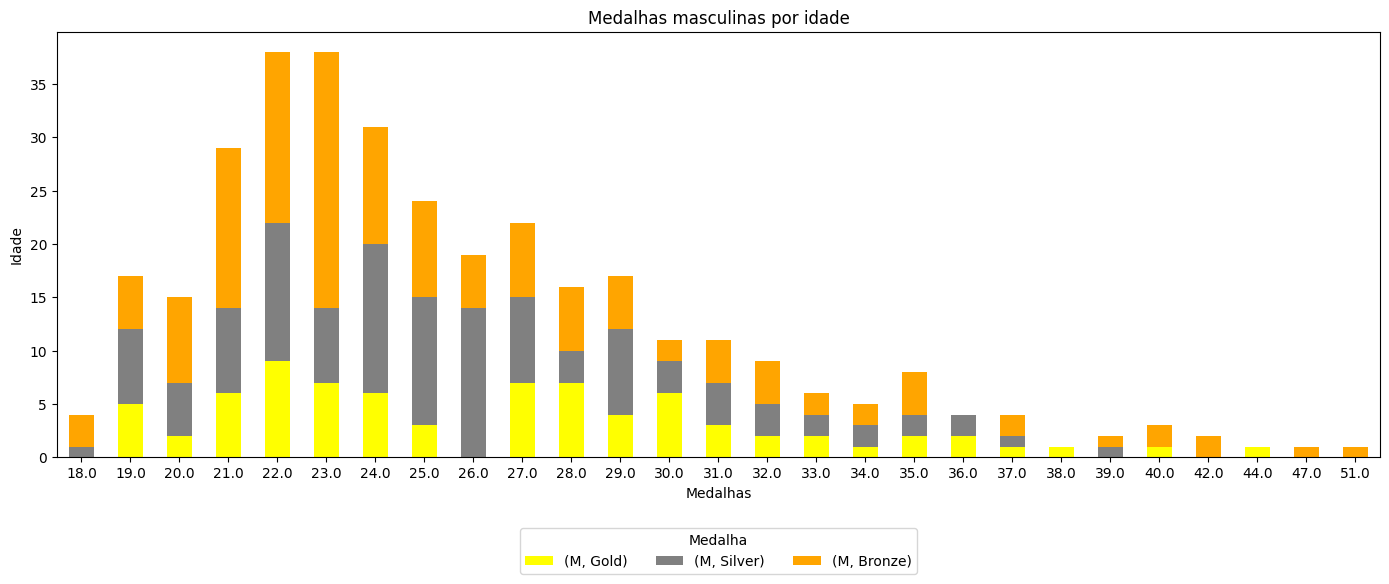

In [61]:
# Medalhistas separados por sexo
idade_medalhista = dados_Br3[dados_Br3['Medalha'].isin(['Gold', 'Silver', 'Bronze'])].groupby(['Idade', 'Sexo', 'Medalha']).size().reset_index(name='Contagem')

# Pivotar o DataFrame
idade_medalhista_pivot = idade_medalhista.pivot_table(index='Idade', columns=['Sexo', 'Medalha'], values='Contagem', fill_value=0)

idade_medalhista_pivot_F = idade_medalhista_pivot.loc[:, [('F', medalha) for medalha in ['Gold', 'Silver', 'Bronze']]]
idade_medalhista_pivot_M = idade_medalhista_pivot.loc[:, [('M', medalha) for medalha in ['Gold', 'Silver', 'Bronze']]]

# Cores personalizadas para medalhas femininas e masculinas
cores_F = ['yellow', 'gray', 'orange']
cores_M = ['yellow', 'gray', 'orange']

# Função para criar gráficos de barras empilhadas
def plot_medalhas_por_idade(df, title, colors):
    ax = df.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)
    plt.title(title)
    plt.xlabel("Medalhas")
    plt.ylabel("Idade")
    plt.legend(title="Medalha", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.xticks(rotation='horizontal')
    plt.tight_layout()
    plt.show()

# Criar gráficos de barras empilhadas para mulheres e homens
plot_medalhas_por_idade(idade_medalhista_pivot_F, "Medalhas femininas por idade", cores_F)
plot_medalhas_por_idade(idade_medalhista_pivot_M, "Medalhas masculinas por idade", cores_M)

In [68]:
import matplotlib.patches as mpatches

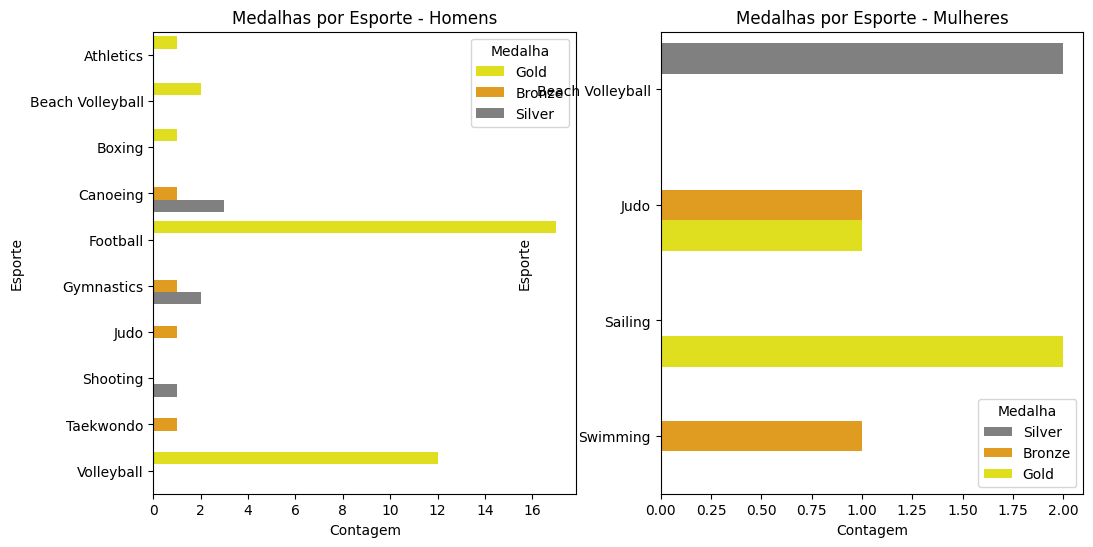

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

medalha_cores = {'Gold': 'yellow', 'Silver': 'gray', 'Bronze': 'orange'}

dados_homens = dados_Br3[(dados_Br3['Ano'] == 2016) & (dados_Br3['Sexo'] == 'M')]
dados_mulheres = dados_Br3[(dados_Br3['Ano'] == 2016) & (dados_Br3['Sexo'] == 'F')]

resultado_por_esporte_homens = dados_homens.groupby(['Esporte', 'Medalha']).size().reset_index(name='Contagem')
resultado_por_esporte_mulheres = dados_mulheres.groupby(['Esporte', 'Medalha']).size().reset_index(name='Contagem')

sns.barplot(data=resultado_por_esporte_homens, x='Contagem', y='Esporte', hue='Medalha', ax=ax1, palette=medalha_cores)
ax1.set_title('Medalhas por Esporte - Homens')

sns.barplot(data=resultado_por_esporte_mulheres, x='Contagem', y='Esporte', hue='Medalha', ax=ax2, palette=medalha_cores)
ax2.set_title('Medalhas por Esporte - Mulheres')

plt.show()


Podemos comcluir que as mulheres tem o seu pico de desempenho - considerado aqui como ganhar medalhas entre os 24 e 27 anos já os homens tem esse pico antes, entre os 21 e os 25 anos. Apesar de não ser um argumento conclusivo pois dedntro dele estão muitas variáveis, podemos verificar uma diferença clara entre os sexos. Porémm é evidete que o rendimento dos atletas brasileiros melhorou.

## Análise (pergunta) 5.

** Se o aumento das medalhas de 2000 pra cá é influenciado pela idade ou pelo sexo do atleta?**

**...**. ...

In [ ]:
#@markdown ---
#@title Q5. Aponte os principais recursos empregados nesta pergunta aqui:

Q5a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q5b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q5c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q5d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q5e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q5f = "" #@param {type:"string"}

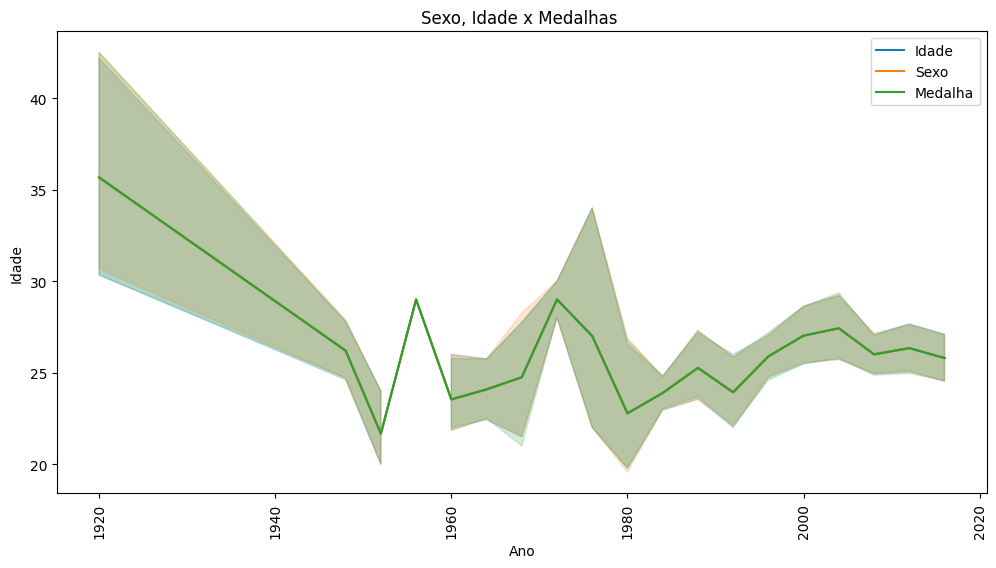

In [71]:
plt.figure(figsize=(12,6))

for c in dados_Br3[['Idade','Sexo','Medalha']]:
  sns.lineplot(x=dados_Br3.Ano, y=dados_Br3['Idade'], label=c)

plt.title('Sexo, Idade x Medalhas ', fontsize=12)
plt.legend()
plt.xticks(rotation=90)
plt.show()

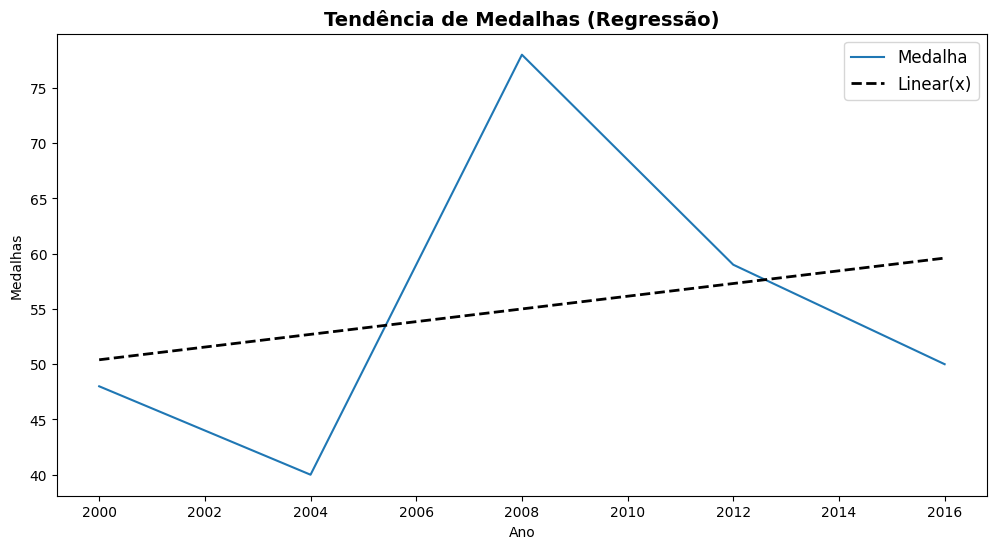

In [72]:
# Tentando verificar este dadao por meio de Regressão Linear
dados_Br3 = dados_Br3[dados_Br3['Ano'] >= 2000]

medalhas_por_ano = dados_Br3.groupby('Ano')['Medalha'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(medalhas_por_ano['Ano'], medalhas_por_ano['Medalha'], label='Medalha')

ax.set_title('Tendência de Medalhas (Regressão)', fontsize=14, weight='bold')
ax.set_xlabel("Ano")
ax.set_ylabel("Medalhas")

z = np.polyfit(medalhas_por_ano['Ano'], medalhas_por_ano['Medalha'], 1)
p = np.poly1d(z)
ax.plot(medalhas_por_ano['Ano'], p(medalhas_por_ano['Ano']), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

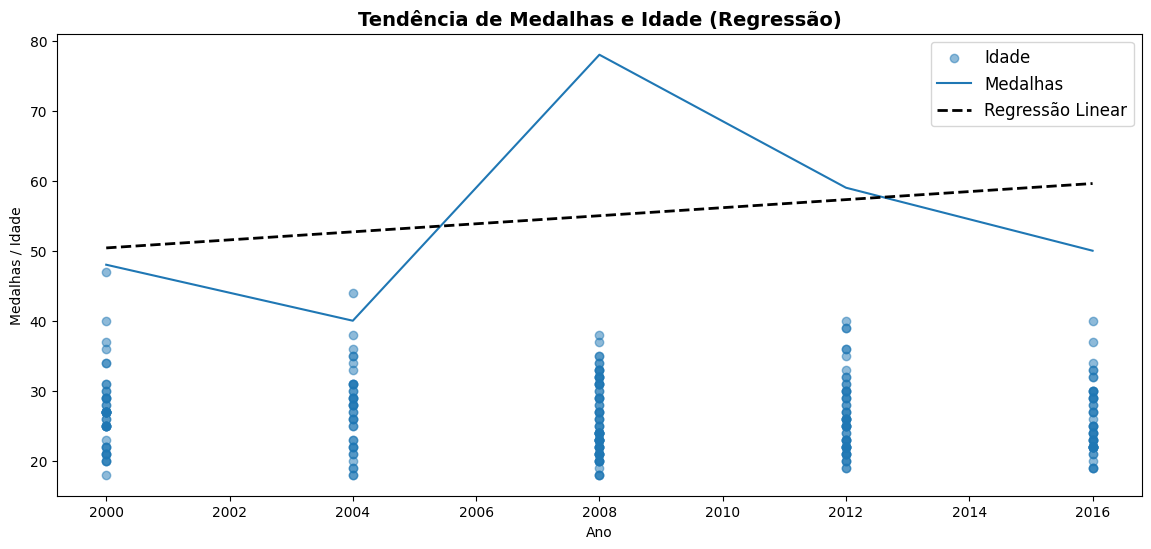

In [73]:
dados_Br3 = dados_Br3[dados_Br3['Ano'] >= 2000]
medalhas_por_ano = dados_Br3.groupby('Ano')['Medalha'].count().reset_index()

fig, ax = plt.subplots(figsize=(14, 6))

plt.scatter(dados_Br3['Ano'], dados_Br3['Idade'], alpha=0.5, label='Idade')

ax.plot(medalhas_por_ano['Ano'], medalhas_por_ano['Medalha'], label='Medalhas')

ax.set_title('Tendência de Medalhas e Idade (Regressão)', fontsize=14, weight='bold')
ax.set_xlabel("Ano")
ax.set_ylabel("Medalhas / Idade")

z = np.polyfit(medalhas_por_ano['Ano'], medalhas_por_ano['Medalha'], 1)
p = np.poly1d(z)

ax.plot(medalhas_por_ano['Ano'], p(medalhas_por_ano['Ano']), linestyle='dashed', label='Regressão Linear', linewidth=2, color='k')

ax.legend(fontsize=12)
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

In [74]:
# Como estes dados não são conclusivos foi neessário uma alteração nos dados iniciais

In [75]:
# Criar uma nova coluna com valores numéricos para as medalhas
medalha_num = []
for medalha in dados_Br3['Medalha']:
    if medalha == 'Gold':
        medalha_num.append(1)
    elif medalha == 'Silver':
        medalha_num.append(2)
    elif medalha == 'Bronze':
        medalha_num.append(3)
    else:
        medalha_num.append(0)

dados_Br3['Medalha_num'] = medalha_num


<ipython-input-76-fcfdb5872257>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Esporte']].corr()


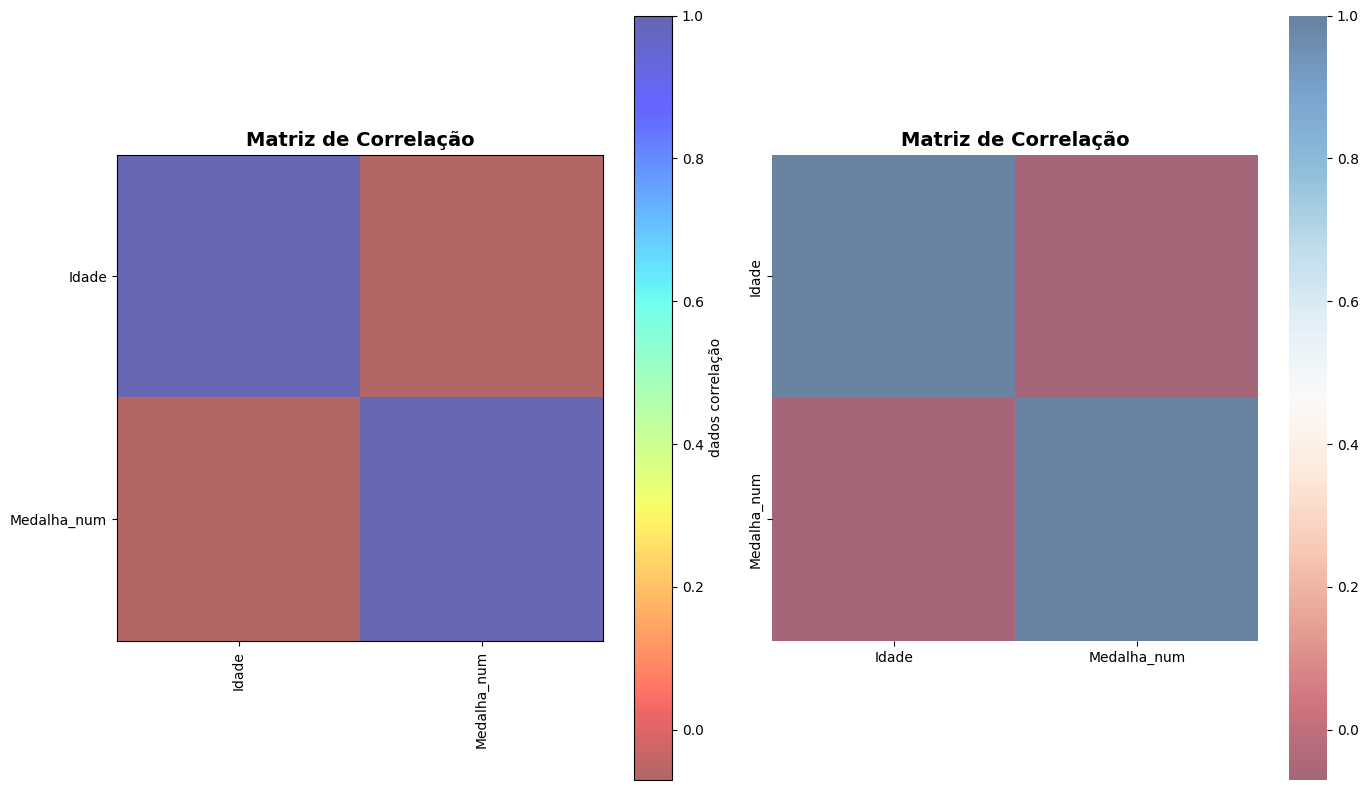

In [76]:
plt.figure(figsize=(14,8))

matriz = dados_Br3[['Idade',
        'Medalha_num', 'Sexo',
        'Esporte']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('dados correlação')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6) 

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

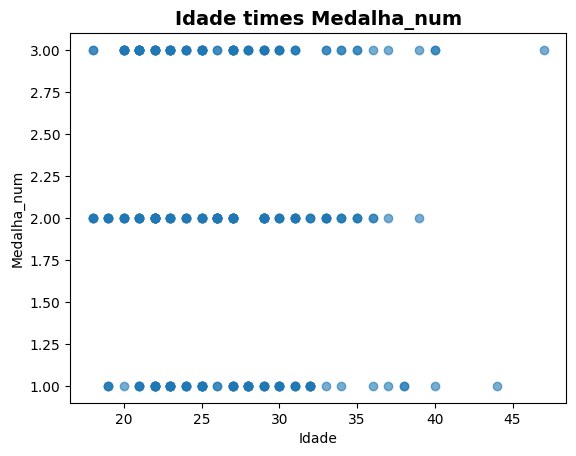

In [77]:

plt.scatter(dados_Br3['Idade'],dados_Br3['Medalha_num'] , alpha=0.6)

plt.title('Idade times Medalha_num' , fontsize=14, weight='bold') 


plt.xlabel('Idade')
plt.ylabel('Medalha_num')

plt.show()

In [79]:
from scipy.stats import linregress


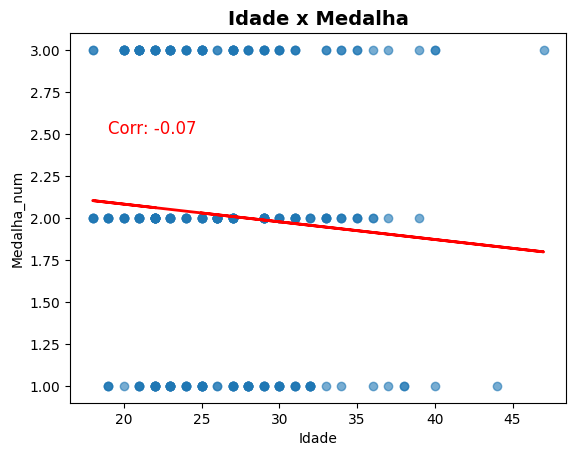

In [80]:
X = dados_Br3['Idade']
Y = dados_Br3['Medalha_num']

slope, intercept, rvalue, pvalue, stderr = linregress(X, Y)
line = slope*X + intercept

plt.scatter(X, Y, alpha=0.6)

plt.plot(X, line, color='red', linewidth=2)

corr = np.round(np.corrcoef(X, Y)[0][1], 2)
plt.text(np.min(X) + 1, np.max(Y) - 0.5, f'Corr: {corr}', fontsize=12, color='red')

plt.title('Idade x Medalha', fontsize=14, weight='bold')
plt.xlabel('Idade')
plt.ylabel('Medalha_num')

plt.show()


In [81]:
pd.options.display.max_rows = 999
dados_Br3[['Idade', 'Medalha_num']].corr()

,Idade,Medalha_num
Idade,1.00000,-0.07022
Medalha_num,-0.07022,1.00000


In [82]:
pd.options.display.max_rows = 999
dados_Br3[['Idade', 'Medalha_num']].corr().abs().unstack().drop_duplicates().sort_values(ascending=False).nlargest(5)

Idade  Idade          1.00000
       Medalha_num    0.07022
dtype: float64

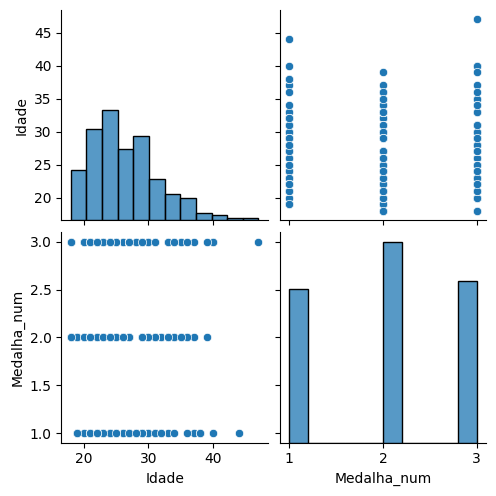

In [83]:
sns.pairplot(dados_Br3[['Idade', 'Medalha_num']])
plt.show()

Após a alteração da dase de dados de string para numérico pude fazer alguns gráficos de correlação, como o Dataset escolhido tem várias variáveis string, essa é uma análise que não resulta em muitas informações não sendo possivel concluir, com esta base de dados se o aumento das medalhas de 2000 pra cá é influenciado pela idade ou pelo sexo do atleta.

# Conclusão
Após a realização das análises dos dados do Dataset Olimpíadas, tentarei responder a pergunta da análise inicial que era se dos eventos ocorridos do ano 2000 pra cá houve o aumento ou diminuição de medalhas e se o sexo e a idade dos atletas tem influência nesta variação.
Podemos concluir com certeza que houve sim um aumento do ganho de medalhas para o Brasil no período estudado, tanto entre os homens quanto entre as mulheres.
O único Outlier que foi tratado foi o dados nulo da coluna Medalha que foi  substituído por 0, a coluna Idade não foi alterada já que considerando as idades mínimas de 12 anos e máxima de 40 anos para o Boxe e a maioria tem até 32 anos, não foi realizada nenhuma alteração neste dado.
Conseguimos responder quase todas as perguntas propostas para análise. O número de medalhas aumentou no período estudado, o esporte que ganhou mais medalhas foi o futebol, a média de idade dos medalhistas é de 20 anos.
O rendimento dos atletas de ambos os sexos melhorou sendo que as mulheres ganham mais medalhas e mantém os esportes que ganham, já os homens estão ganhando menos medalhas porém em mais esportes, no montante, aumentando o número de medalhas também.
Porém não posso afirmar que este aumento do número de medalhas é influenciado pela idade ou pelo sexo do atleta já que os gráfricos de correlação e de dispersão não indicam uma dependência linear entre as colunas avaliadas, já que uma correlação de -0.07 indica uma correlação negativa fraca entre as duas variáveis que significa que quando o valor de uma aumenta, o valor da outra tende a diminuir ligeiramente, e vice-versa.
A única correlação que é possível visualizar é que quando o atleta é mais jovem ele ganha mais medalhas e conforme o valor da idade aumenta, o valor o ganho de medalhas diminui, esta informação é visualizada no gráfico pairplot.



---

In [ ]:
#@markdown ---
#@title Notas
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas todas as 6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados. 
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema. 
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatíticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva 
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}

#@markdown ### Sumário 
#@markdown ---

resumo = {}
for q in range(1,7):
  resumo[q] = []
  for t in ['a','b','c','d','e','f']:
    exec( 'resumo[q].append(Q' + str(q) + t + ')')

for q, recurso in resumo.items():
  for i in range(len(recurso)):
    if recurso[i][0:5] == 'Entre':
      recurso[i] = 'None'

print('Resumo')
print(60*'-')
for q in resumo:
  print('*** Questão: ', q)
  for r in resumo[q]:
    print(r)



Resumo
------------------------------------------------------------
*** Questão:  1
None
None
None
None
None

*** Questão:  2
None
None
None
None
None

*** Questão:  3
None
None
None
None
None

*** Questão:  4
None
None
None
None
None

*** Questão:  5
None
None
None
None
None

*** Questão:  6
None
None
None
None
None



In [ ]:
#@markdown ### Nota Final
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao 
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus  

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.2f}')



Nota final do trabalho 7.90
